In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [197]:
data=pd.read_csv('collegePlace.csv')

In [198]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [199]:
data.shape

(2966, 8)

In [200]:
data.info

<bound method DataFrame.info of       Age  Gender  ... HistoryOfBacklogs  PlacedOrNot
0      22    Male  ...                 1            1
1      21  Female  ...                 1            1
2      22  Female  ...                 0            1
3      21    Male  ...                 1            1
4      22    Male  ...                 0            1
...   ...     ...  ...               ...          ...
2961   23    Male  ...                 0            0
2962   23    Male  ...                 0            0
2963   22    Male  ...                 0            0
2964   22    Male  ...                 0            0
2965   23    Male  ...                 0            1

[2966 rows x 8 columns]>

In [201]:
missing=data.isnull().sum().sort_values(ascending=False)
missing[missing>0]


Series([], dtype: int64)

In [202]:
cat=data.select_dtypes(include="object")
cat.columns

Index(['Gender', 'Stream'], dtype='object')

In [203]:
num=data.select_dtypes(include=["int64","float64"])
num.columns

Index(['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'PlacedOrNot'],
      dtype='object')

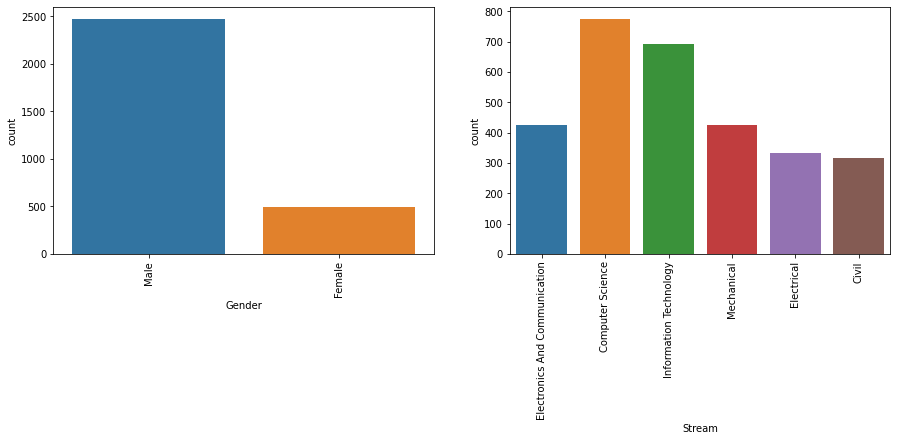

In [210]:
cat=data.select_dtypes(include="object")
L=[2,2,1]
a,b,c=L
fig=plt.figure(figsize=(15,10))
for x in cat:
  plt.subplot(a,b,c)
  sns.countplot(data[x])
  x=plt.xticks(rotation=90)

  
  c=c+1


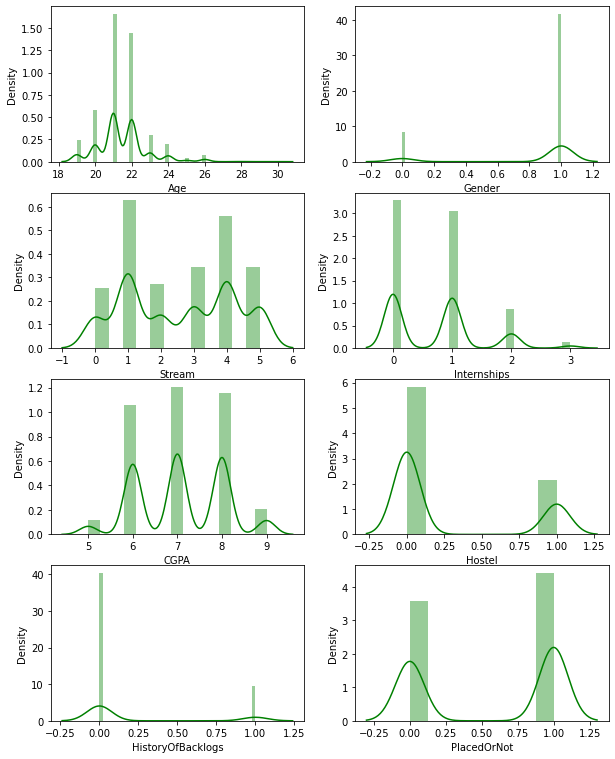

In [236]:
num=data.select_dtypes(include=["int64","float64"])
L=[6,2,1]
a,b,c=L
fig=plt.figure(figsize=(10,20))
for x in num:
  plt.subplot(a,b,c)
  sns.distplot(data[x],color="green")
  
  c=c+1

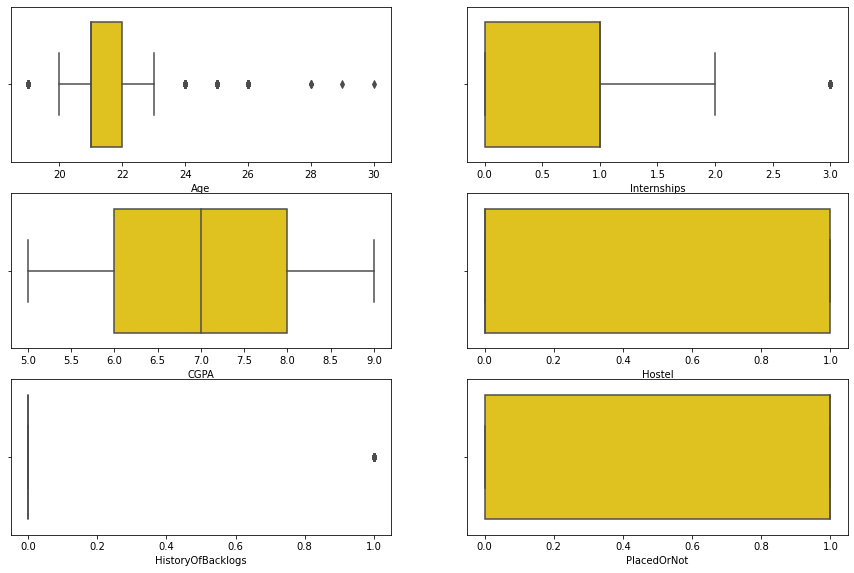

In [216]:
num=data.select_dtypes(include=["int64","float64"])
L=[6,2,1]
a,b,c=L
fig=plt.figure(figsize=(15,20))
for x in num:
  plt.subplot(a,b,c)
  sns.boxplot(data[x],color="gold")
  
  c=c+1

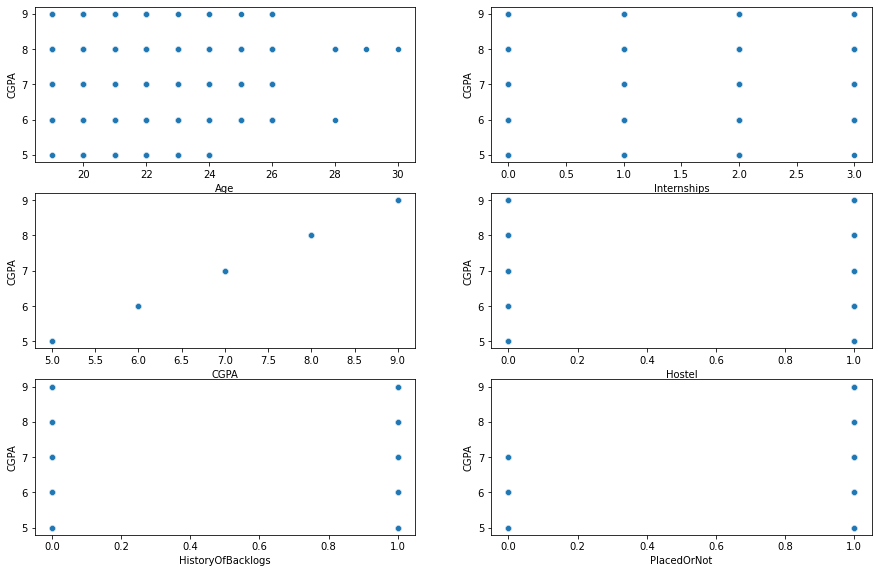

In [219]:
num=data.select_dtypes(include=["int64","float64"])
L=[6,2,1]
a,b,c=L
fig=plt.figure(figsize=(15,20))
for x in num:
  plt.subplot(a,b,c)
  sns.scatterplot(data[x],data['CGPA'])
  
  c=c+1

In [220]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2966.0,21.485840,1.324933,19.0,21.0,21.0,22.0,30.0
Internships,2966.0,0.703641,0.740197,0.0,0.0,1.0,1.0,3.0
CGPA,2966.0,7.073837,0.967748,5.0,6.0,7.0,8.0,9.0
Hostel,2966.0,0.269049,0.443540,0.0,0.0,0.0,1.0,1.0
HistoryOfBacklogs,2966.0,0.192178,0.394079,0.0,0.0,0.0,0.0,1.0
PlacedOrNot,2966.0,0.552596,0.497310,0.0,0.0,1.0,1.0,1.0


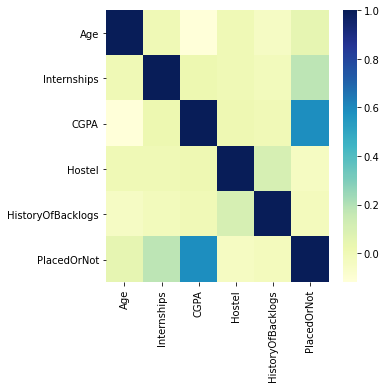

In [221]:
# plotting Heat map
corr=data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr ,cmap="YlGnBu",annot=False)

In [222]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cat_data=data.select_dtypes(include='object')
for x in cat_data:
  data[x]=label.fit_transform(data[x].astype(str))

In [223]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


In [225]:
x=data.drop(['PlacedOrNot'],axis=1)
y=data[['PlacedOrNot']]

In [226]:
#import model to test the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_test.shape,y_train.shape

((1987, 7), (979, 7), (979, 1), (1987, 1))

In [227]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)
xgb_predict=model_xgb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print(classification_report(y_test,xgb_predict))
confusion_matrix(y_test,xgb_predict)

accuracy score :
 0.8784473953013279
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       432
           1       0.96      0.82      0.88       547

    accuracy                           0.88       979
   macro avg       0.88      0.89      0.88       979
weighted avg       0.89      0.88      0.88       979



array([[412,  20],
       [ 99, 448]])

In [228]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(x_train,y_train)
RF_predict=model_RF.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print(classification_report(y_test,RF_predict))
confusion_matrix(y_test,RF_predict)

accuracy score :
 0.8764044943820225
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       432
           1       0.93      0.84      0.88       547

    accuracy                           0.88       979
   macro avg       0.88      0.88      0.88       979
weighted avg       0.88      0.88      0.88       979



array([[399,  33],
       [ 88, 459]])

In [229]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier()
model_lgb.fit(x_train,y_train)
lgb_predict=model_lgb.predict(x_test)
from sklearn.metrics import accuracy_score ,confusion_matrix 
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print(classification_report(y_test,lgb_predict))
confusion_matrix(y_test,lgb_predict)

accuracy score :
 0.8855975485188968
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       432
           1       0.95      0.84      0.89       547

    accuracy                           0.89       979
   macro avg       0.89      0.89      0.89       979
weighted avg       0.89      0.89      0.89       979



array([[410,  22],
       [ 90, 457]])

In [230]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier()
model_DT.fit(x_train,y_train)
DT_predict=model_DT.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))
print(classification_report(y_test,DT_predict))
confusion_matrix(y_test,DT_predict)


accuracy score :
 0.8723186925434117
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       432
           1       0.93      0.84      0.88       547

    accuracy                           0.87       979
   macro avg       0.87      0.88      0.87       979
weighted avg       0.88      0.87      0.87       979



array([[397,  35],
       [ 90, 457]])

In [231]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=2, p=1,
                     weights='uniform')
model_KNN.fit(x_train,y_train)
KNN_predict=model_KNN.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=KNN_predict))
print(classification_report(y_test,KNN_predict))
confusion_matrix(y_test,KNN_predict)


accuracy score :
 0.8386108273748724
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       432
           1       0.96      0.74      0.84       547

    accuracy                           0.84       979
   macro avg       0.85      0.85      0.84       979
weighted avg       0.87      0.84      0.84       979



array([[416,  16],
       [142, 405]])

In [232]:
from sklearn.ensemble import  AdaBoostClassifier
model_ab=AdaBoostClassifier()
model_ab.fit(x_train,y_train)
ab_predict=model_ab.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=ab_predict))
print(classification_report(y_test,ab_predict))
confusion_matrix(y_test,ab_predict)

accuracy score :
 0.8733401430030644
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       432
           1       0.95      0.81      0.88       547

    accuracy                           0.87       979
   macro avg       0.88      0.88      0.87       979
weighted avg       0.89      0.87      0.87       979



array([[410,  22],
       [102, 445]])

In [233]:
from sklearn.ensemble import  GradientBoostingClassifier
model_gb=GradientBoostingClassifier()
model_gb.fit(x_train,y_train)
gb_predict=model_gb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=gb_predict))
print(classification_report(y_test,gb_predict))
confusion_matrix(y_test,gb_predict)

accuracy score :
 0.8804902962206334
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       432
           1       0.96      0.82      0.88       547

    accuracy                           0.88       979
   macro avg       0.88      0.89      0.88       979
weighted avg       0.89      0.88      0.88       979



array([[415,  17],
       [100, 447]])

In [234]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
NB_predict=model.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=NB_predict))
print(classification_report(y_test,xgb_predict))
confusion_matrix(y_test,NB_predict)

accuracy score :
 0.7987742594484167
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       432
           1       0.96      0.82      0.88       547

    accuracy                           0.88       979
   macro avg       0.88      0.89      0.88       979
weighted avg       0.89      0.88      0.88       979



array([[364,  68],
       [129, 418]])

In [235]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)
svm_predict=model_svm.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=svm_predict))
print(classification_report(y_test,svm_predict))
confusion_matrix(y_test,svm_predict)

accuracy score :
 0.7732379979570991
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       432
           1       0.84      0.74      0.78       547

    accuracy                           0.77       979
   macro avg       0.77      0.78      0.77       979
weighted avg       0.78      0.77      0.77       979



array([[352,  80],
       [142, 405]])